In [1]:
import numpy as np
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

# MNIST 데이터셋 로드 및 데이터 분할 및 표준화
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 입력 데이터(X)와 타겟 데이터(Y) 생성
class_index = 0
X = train_images.reshape(-1, 28*28) / 255
X_set = X[train_labels == class_index]
Y_set = (class_index) * np.ones(X_set.shape[0])


# 클래스별 데이터 수집
for i in range(1,10):
  X_set = np.append(X_set, X[train_labels == i], axis=0)
  Y_set = np.append(Y_set, i * np.ones(X_set.shape[0] - Y_set.shape[0]))

# 타겟 데이터 타입 변환
Y_set = Y_set.astype('int64')

# train 데이터와 test 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X_set, Y_set, test_size=0.3, random_state=1, stratify=Y_set)

# 클래스 레이블 개수 출력
print('y의 레이블 카운트 : ', np.bincount(Y_set))
print('y_train의 레이블 카운트 : ', np.bincount(y_train))
print('y_test의 레이블 카운트 : ', np.bincount(y_test))

# SVM 객체 생성 및 훈련
svm = SVC(kernel='rbf', gamma=0.3, C=1.0, random_state=1, max_iter=500)
svm.fit(X_train, y_train)



C:\Users\lg\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


y의 레이블 카운트 :  [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]
y_train의 레이블 카운트 :  [4146 4719 4171 4292 4089 3795 4143 4385 4096 4164]
y_test의 레이블 카운트 :  [1777 2023 1787 1839 1753 1626 1775 1880 1755 1785]


C:\Users\lg\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(gamma=0.3, max_iter=500, random_state=1)

In [2]:
# X_test에 대한 클래스 예측
y_pred = svm.predict(X_test)
print("y_pred: ", y_pred)

y_pred:  [4 9 8 ... 6 7 9]


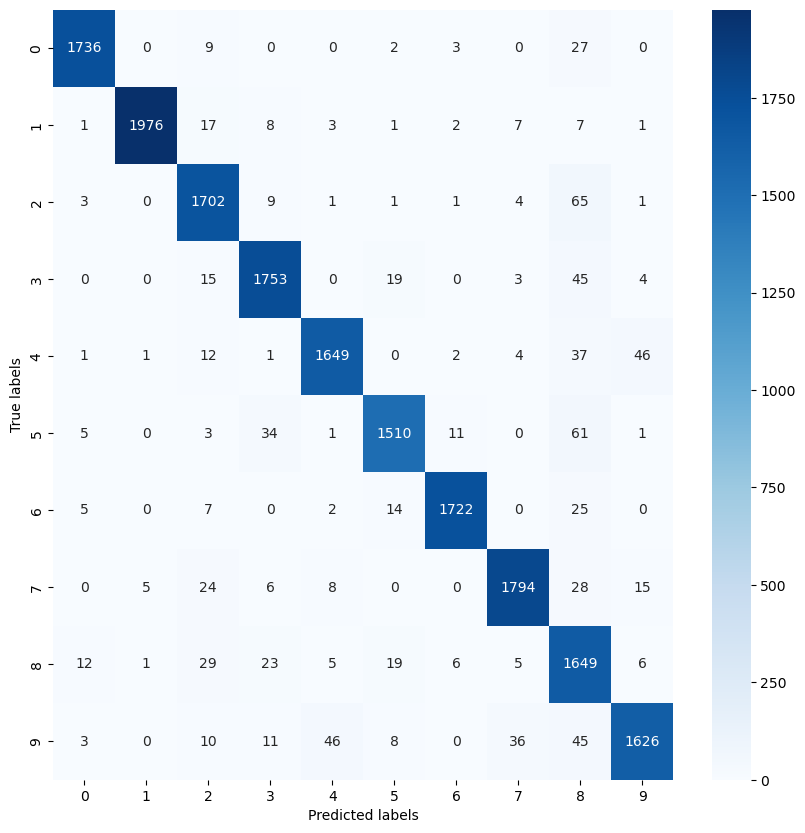

In [3]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix 계산
cm = confusion_matrix(y_test, y_pred)



# Confusion Matrix 시각화
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.show()

In [6]:
print(cm)

[[1736    0    9    0    0    2    3    0   27    0]
 [   1 1976   17    8    3    1    2    7    7    1]
 [   3    0 1702    9    1    1    1    4   65    1]
 [   0    0   15 1753    0   19    0    3   45    4]
 [   1    1   12    1 1649    0    2    4   37   46]
 [   5    0    3   34    1 1510   11    0   61    1]
 [   5    0    7    0    2   14 1722    0   25    0]
 [   0    5   24    6    8    0    0 1794   28   15]
 [  12    1   29   23    5   19    6    5 1649    6]
 [   3    0   10   11   46    8    0   36   45 1626]]


In [25]:
Precision = []
recall = []

for i in range (10) : 
    FP = 0
    TN = 0
    FN = 0
    
    TP = cm[i][i]
        
    for f in range(10) :
        if f != i :
            FN = FN + cm[i][f]
            FP = FP + cm[f][i]   
            
        for t in range(10) :
            if (t != i) & (f != i) :
                TN = TN + cm[f][t]
                
    Precision.append(TP / (TP + FP))
    recall.append(TP / (TP + FN))

    print("Precision of", i, ":", Precision[i])    
    print("recall of", i, ":", recall[i])    

Precision of 0 : 0.9830124575311439
recall of 0 : 0.9769274057400112
Precision of 1 : 0.9964699949571356
recall of 1 : 0.9767671774592189
Precision of 2 : 0.9310722100656456
recall of 2 : 0.9524342473419138
Precision of 3 : 0.9501355013550136
recall of 3 : 0.9532354540511148
Precision of 4 : 0.9615160349854227
recall of 4 : 0.9406731317741015
Precision of 5 : 0.9593392630241423
recall of 5 : 0.9286592865928659
Precision of 6 : 0.9856897538637664
recall of 6 : 0.9701408450704225
Precision of 7 : 0.9681597409606044
recall of 7 : 0.9542553191489361
Precision of 8 : 0.8290598290598291
recall of 8 : 0.9396011396011396
Precision of 9 : 0.9564705882352941
recall of 9 : 0.9109243697478991


In [27]:
# Average of Accuracy = 대각선값의 총 합 / 전체 값의 총 합
total = 0
diaglineSum = cm[0][0] + cm[1][1] + cm[2][2] + cm[3][3] + cm[4][4] + cm[5][5] + cm[6][6]+ cm[7][7] + cm[8][8] + cm[9][9]
for i in range (10) :
    for k in range (10) :
        total = total + cm[i][k]
Accuracy = diaglineSum / total
print("Accuracy :",Accuracy)

# Average of Precision
avePrecision = np.mean(Precision)
print("Average of Precision :",avePrecision)

# Average of recall
averecall = np.mean(recall)
print("Average of recall :",averecall)

# F1 score
f1_score = 2 * (avePrecision * averecall) / (avePrecision + averecall)
print("F1 Score :",f1_score)

Accuracy : 0.9509444444444445
Average of Precision : 0.9520925374037998
Average of recall : 0.9503618376527625
F1 Score : 0.9512264003026668
